In [1]:
import os

os.chdir('/mnt/c/Users/User/Documents/codes/DL')

In [2]:
!ls 

MNIST_Ejm_GPU.ipynb  convert_model_to_h.ipynb  tf_gpu_test1.ipynb


In [3]:
import tensorflow as tf

print("Versión de tensorflow:{}".format(tf.__version__))
print("GPU:{}".format(tf.test.gpu_device_name()))

2024-10-31 21:19:53.939303: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730427593.949553    1819 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730427593.952505    1819 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-31 21:19:53.962800: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Versión de tensorflow:2.18.0
GPU:/device:GPU:0


I0000 00:00:1730427596.062249    1819 gpu_device.cc:2022] Created device /device:GPU:0 with 5312 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Ti, pci bus id: 0000:01:00.0, compute capability: 8.9


In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
#class_names = ['Camiseta','Pantalón','Suéter','Vestido','Abrigo','Sandalia','Camisa','Zapatilla deportiva','Bolso','Botines']

In [4]:
from tensorflow.keras.datasets import mnist

# Cargar y preprocesar el dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalización

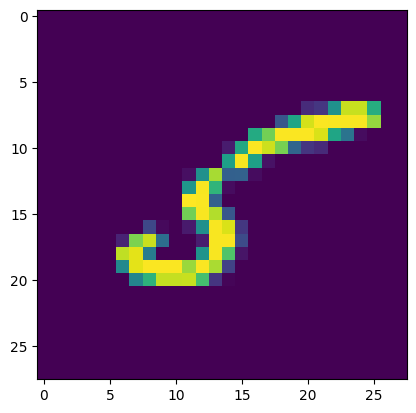

In [17]:
plt.imshow(x_train[11])
plt.grid(False)
plt.show()
#print(class_names[train_labels[11]])
#print(train_images[11].shape)

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [6]:
model = Sequential([
 Flatten(input_shape=(28,28)),
 Dense(150, activation='relu'),
 Dense(10, activation='softmax')
])

/home/moises/tf-gpu-env/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
I0000 00:00:1730427604.267504    1819 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5312 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Ti, pci bus id: 0000:01:00.0, compute capability: 8.9


In [7]:
model.compile(optimizer = 'adadelta',loss = 'sparse_categorical_crossentropy',metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 150)            │       117,750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 119,260 (465.86 KB)

 Trainable params: 119,260 (465.86 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
#model.fit(train_images,train_labels, batch_size=12, epochs=10)
model.fit(x_train, y_train, batch_size=12, epochs=5)  # Usa más epochs según lo necesites


Epoch 1/5


I0000 00:00:1730427652.331000    1892 service.cc:148] XLA service 0x7faeac007990 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730427652.331029    1892 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Ti, Compute Capability 8.9
2024-10-31 21:20:52.339626: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1730427652.376211    1892 cuda_dnn.cc:529] Loaded cuDNN version 90300


 163/5000 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.1113 - loss: 2.3918

I0000 00:00:1730427653.320590    1892 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


5000/5000 ━━━━━━━━━━━━━━━━━━━━ 6s 1ms/step - accuracy: 0.1391 - loss: 2.3094
Epoch 2/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.3358 - loss: 2.0219
Epoch 3/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.5456 - loss: 1.7855
Epoch 4/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.6591 - loss: 1.5744
Epoch 5/5
5000/5000 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7269 - loss: 1.3880


In [11]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7496 - loss: 1.3004
Test: 0.7699000239372253


In [13]:
# Convertir el modelo a TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Guardar el modelo .tflite
with open('modelo.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp4fpyj2p6/assets


INFO:tensorflow:Assets written to: /tmp/tmp4fpyj2p6/assets


Saved artifact at '/tmp/tmp4fpyj2p6'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  140392421963152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140392421961808: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140392421965072: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140392421964880: TensorSpec(shape=(), dtype=tf.resource, name=None)


W0000 00:00:1730427685.116970    1819 tf_tfl_flatbuffer_helpers.cc:365] Ignored output_format.
W0000 00:00:1730427685.116999    1819 tf_tfl_flatbuffer_helpers.cc:368] Ignored drop_control_dependency.
2024-10-31 21:21:25.117207: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /tmp/tmp4fpyj2p6
2024-10-31 21:21:25.117414: I tensorflow/cc/saved_model/reader.cc:52] Reading meta graph with tags { serve }
2024-10-31 21:21:25.117418: I tensorflow/cc/saved_model/reader.cc:147] Reading SavedModel debug info (if present) from: /tmp/tmp4fpyj2p6
I0000 00:00:1730427685.119140    1819 mlir_graph_optimization_pass.cc:401] MLIR V1 optimization pass is not enabled
2024-10-31 21:21:25.119472: I tensorflow/cc/saved_model/loader.cc:236] Restoring SavedModel bundle.
2024-10-31 21:21:25.130354: I tensorflow/cc/saved_model/loader.cc:220] Running initialization op on SavedModel bundle at path: /tmp/tmp4fpyj2p6
2024-10-31 21:21:25.134082: I tensorflow/cc/saved_model/loader.cc:466] SavedModel 

In [14]:
!xxd -i modelo.tflite > modelo.h